In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

### Checking for Missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Checking for duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

### Checking for datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

print(f"{cat_cols} \n {num_cols}")
print(len(cat_cols), len(num_cols))

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object') 
 Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
5 3


### Check for unique values of each columns

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
for i in cat_cols:
    print(f"Categories in {i} with size {len(df[i].unique())} :\t{df[i].unique()}")

Categories in gender with size 2 :	['female' 'male']
Categories in race_ethnicity with size 5 :	['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education with size 6 :	["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch with size 2 :	['standard' 'free/reduced']
Categories in test_preparation_course with size 2 :	['none' 'completed']


### Checking Statistics for dataset

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Checking for various categories in different categorical columns

In [25]:
for col in cat_cols:
    print(f"Categories in {col} variable:     ",end=" " )
    print(df[col].unique())

Categories in gender variable:      ['female' 'male']
Categories in race_ethnicity variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:      ['standard' 'free/reduced']
Categories in test_preparation_course variable:      ['none' 'completed']


# Exploratory Data Analysis

In [26]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [28]:
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_marks'] = df['total_marks'] / 3

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
maximum_marks = df[df['total_marks'] == df['total_marks'].max()]
maximum_marks

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [40]:
minimum_marks = df[df['total_marks'] == df['total_marks'].min()]
minimum_marks

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0


In [38]:
### full marks in each subject
reading_full = df[df['reading_score'] == 100]['average_marks'].count()
writing_full = df[df['writing_score'] == 100]['average_marks'].count()
math_full = df[df['math_score'] == 100]['average_marks'].count()

print(f"Reading full marks: {reading_full} \n Writing full marks: {writing_full} \n Math full marks: {math_full}")

Reading full marks: 17 
 Writing full marks: 14 
 Math full marks: 7


In [39]:
reading_less_than_40 = df[df['reading_score'] < 40]['average_marks'].count()
writing_less_than_40 = df[df['writing_score'] < 40]['average_marks'].count()
math_less_than_40 = df[df['math_score'] < 40]['average_marks'].count()

print(f"Reading less than 40: {reading_less_than_40} \n Writing less than 40: {writing_less_than_40} \n Math less than 40: {math_less_than_40}")

Reading less than 40: 26 
 Writing less than 40: 32 
 Math less than 40: 40


<Axes: xlabel='total_marks', ylabel='Count'>

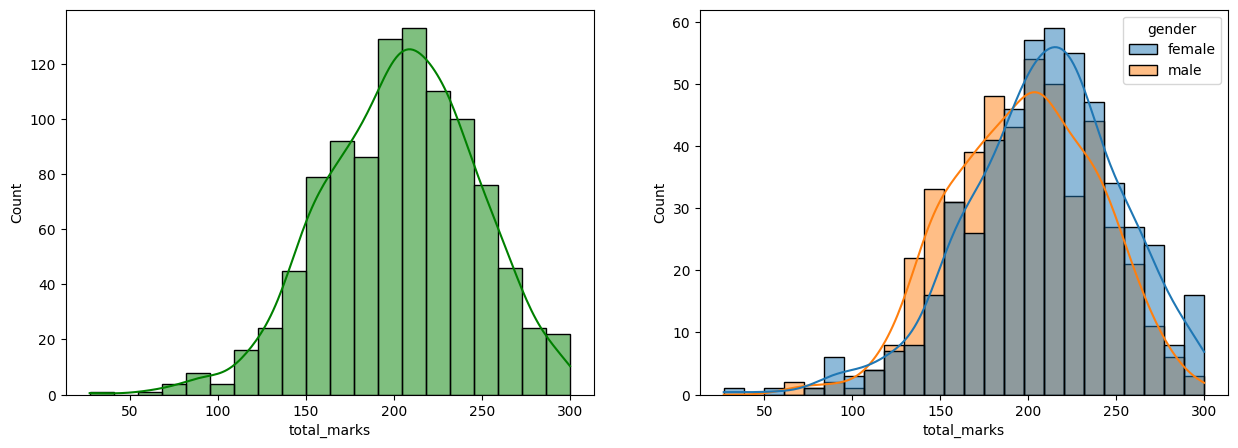

In [43]:
fig ,ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='total_marks',bins=20, kde=True, ax=ax[0], color='green')
sns.histplot(data=df, x='total_marks',hue='gender', kde=True, ax=ax[1])

<Axes: xlabel='average_marks', ylabel='Count'>

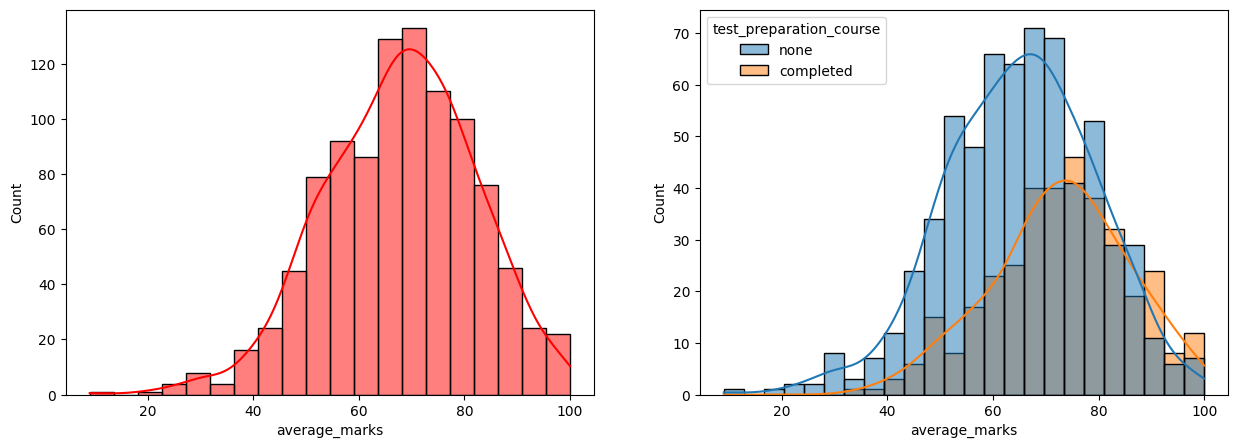

In [44]:
fig ,ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='average_marks',bins=20, kde=True, ax=ax[0], color='red')
sns.histplot(data=df, x='average_marks',hue='test_preparation_course', kde=True, ax=ax[1])

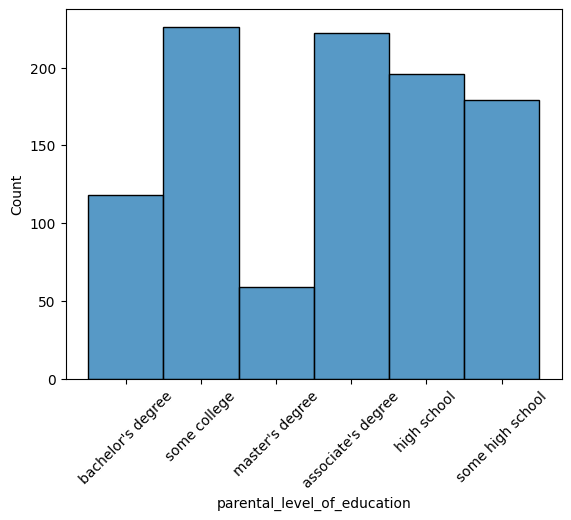

In [56]:
sns.histplot(data=df['parental_level_of_education'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='race_ethnicity', ylabel='Count'>

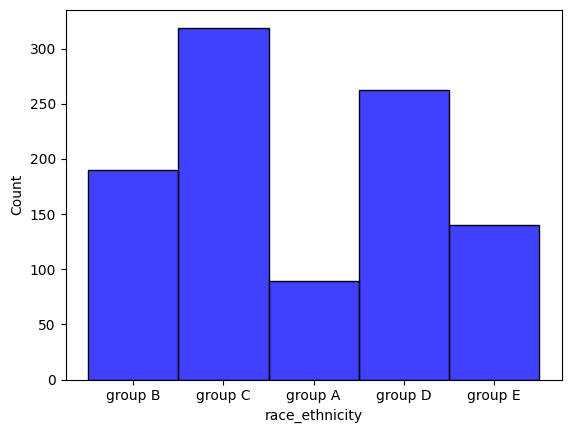

In [48]:
sns.histplot(data=df['race_ethnicity'], bins=20, kde=False, color='blue')

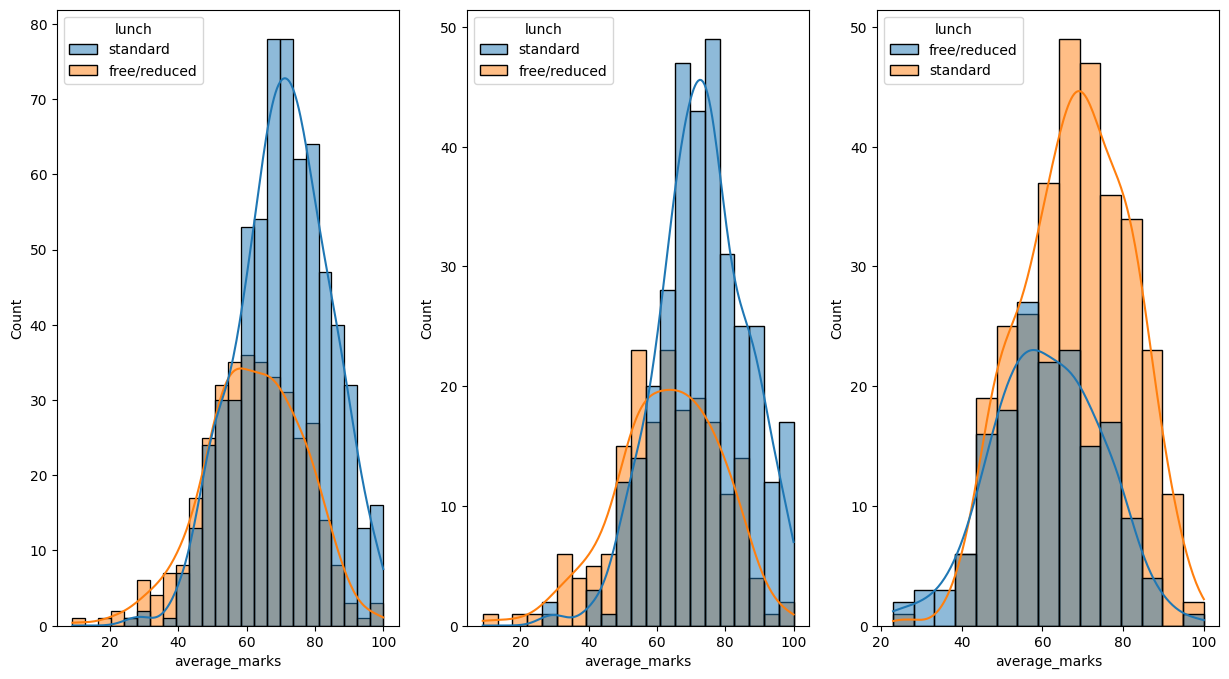

In [71]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
sns.histplot(data=df,x='average_marks',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.show()

In [62]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


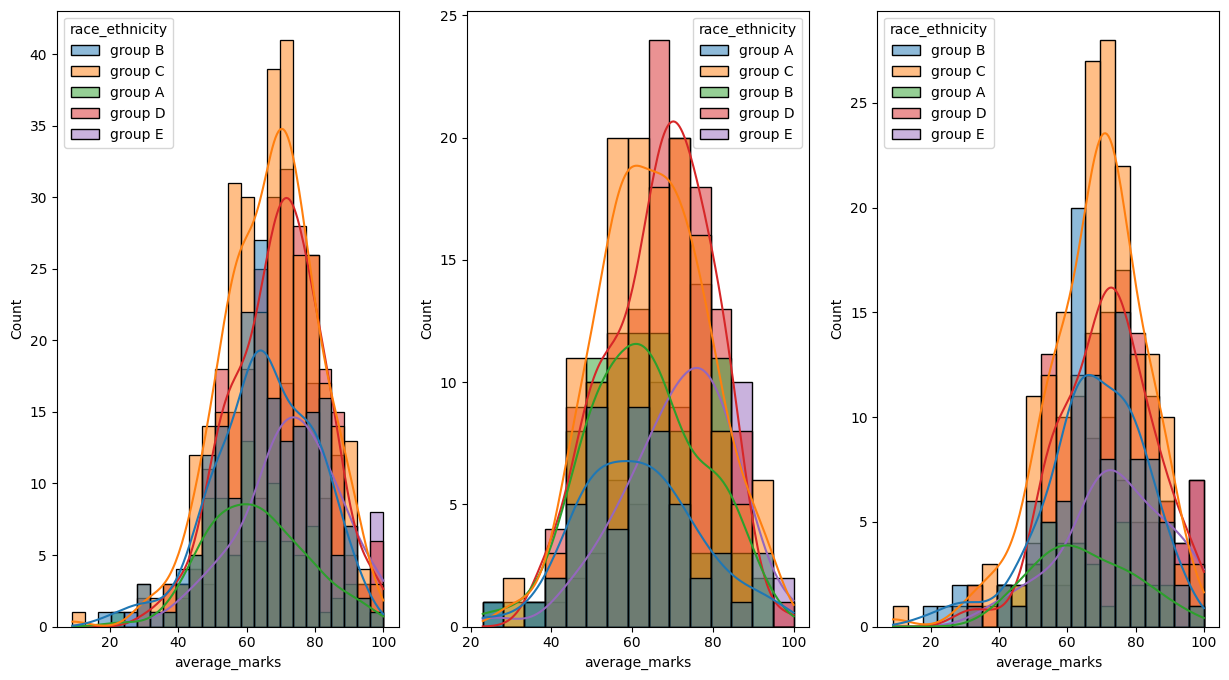

In [69]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='race_ethnicity')
plt.show()

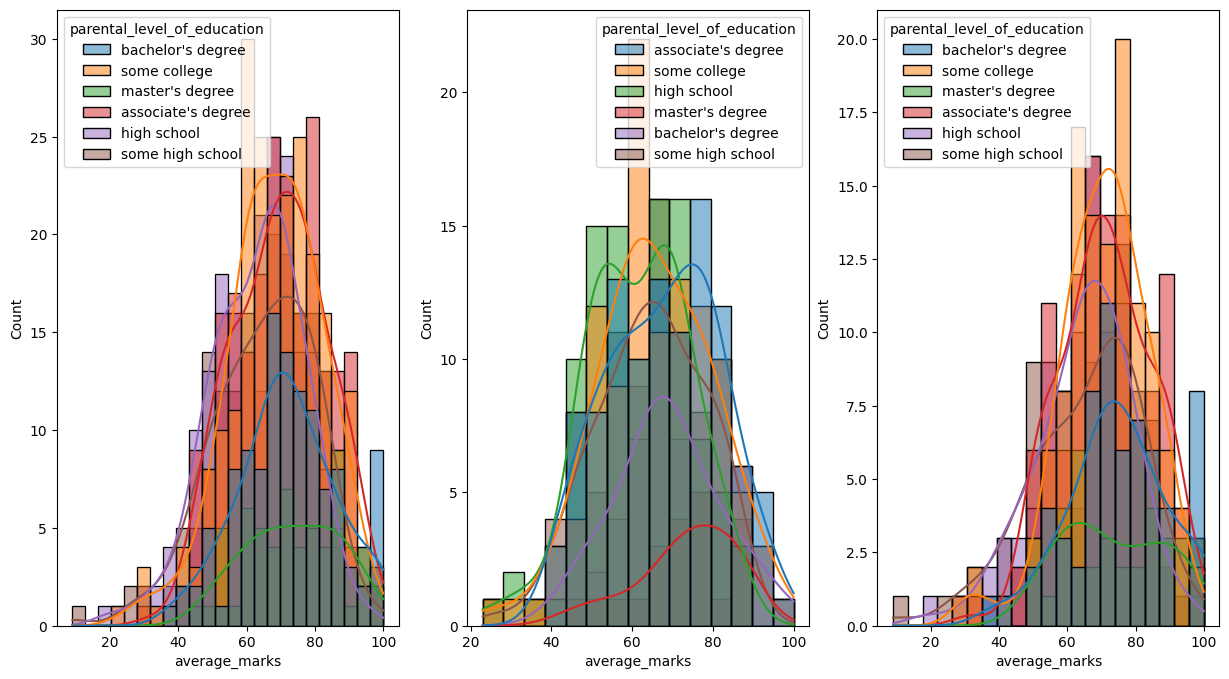

In [70]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.show()

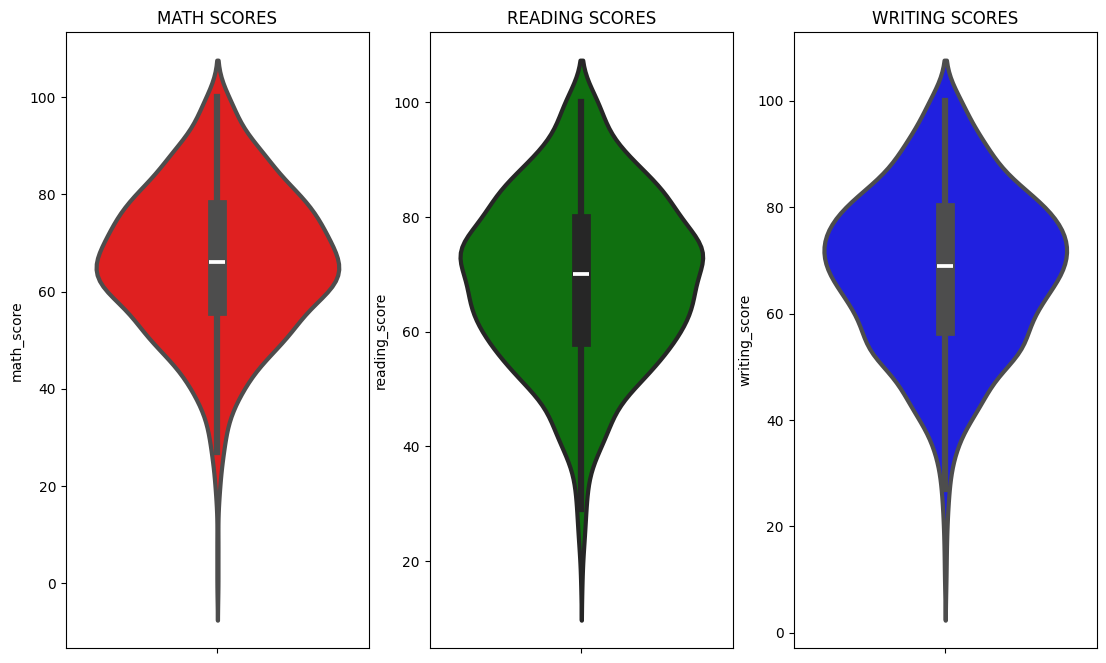

In [74]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [76]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


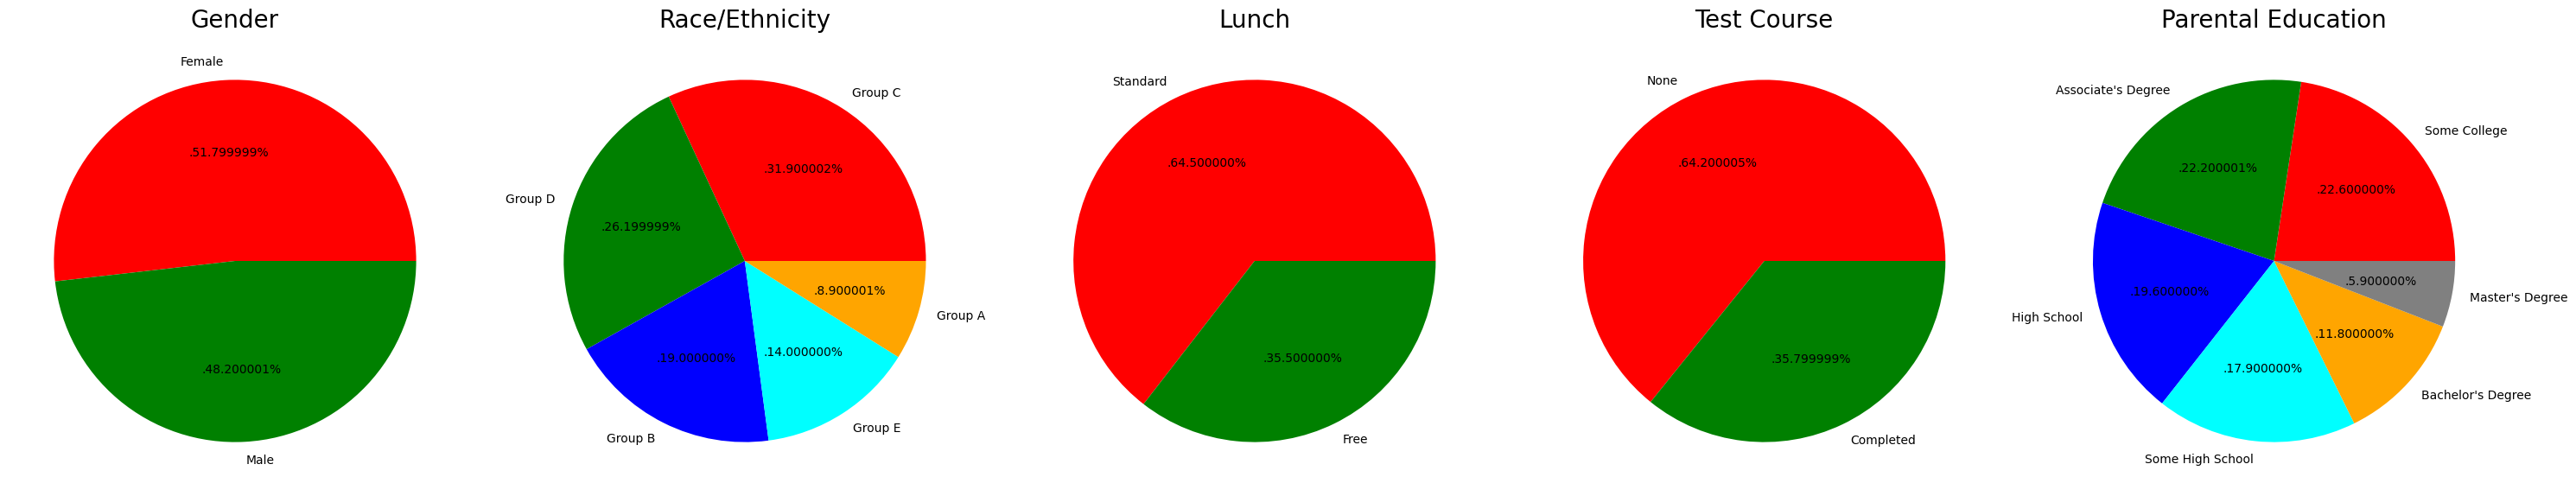

In [77]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

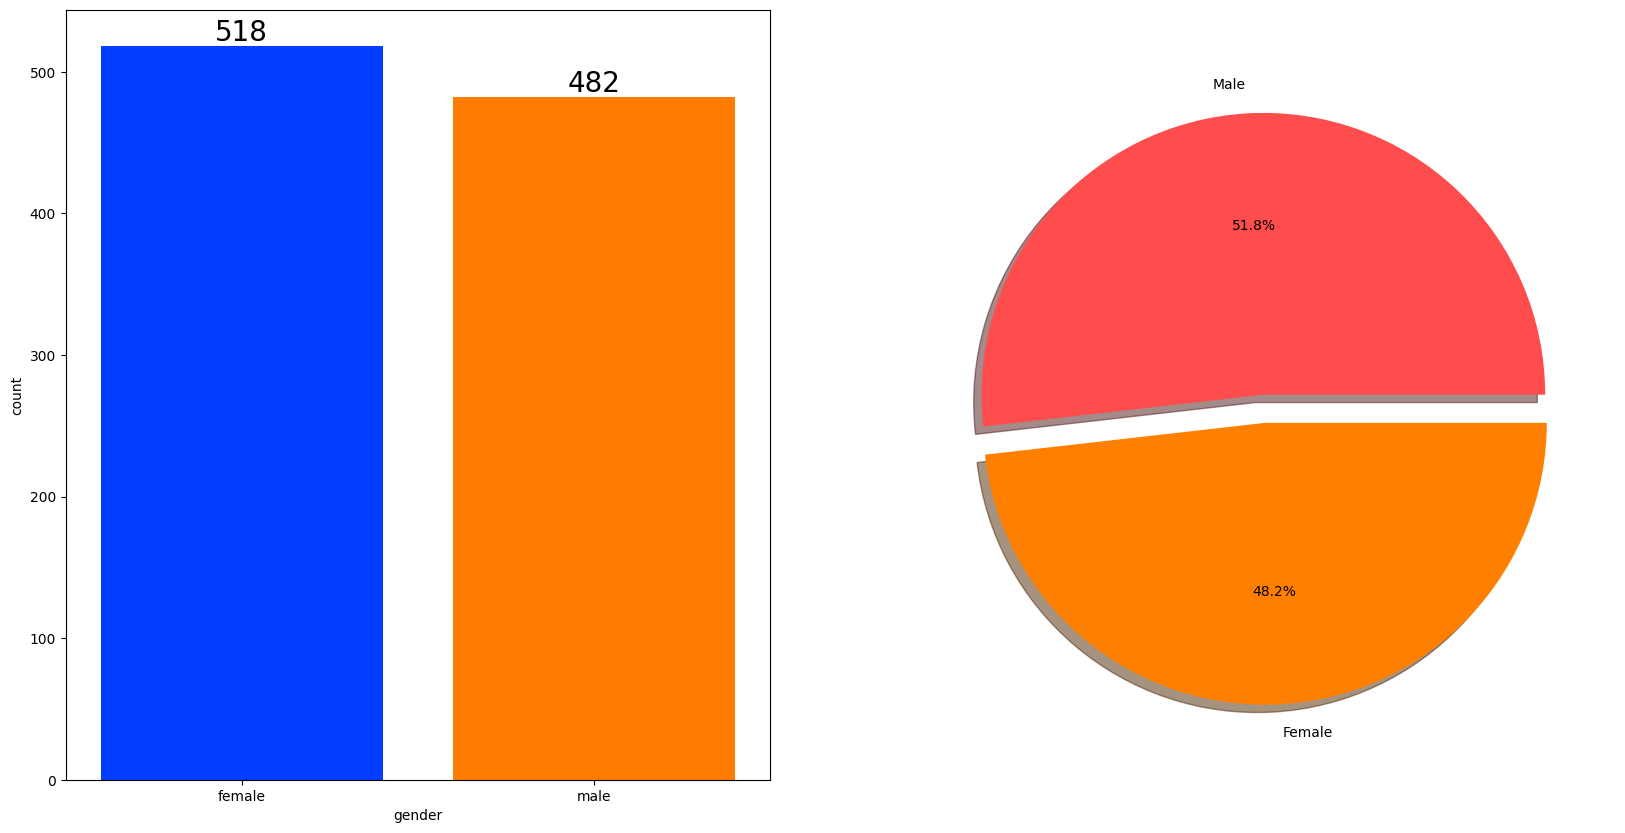

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=1)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

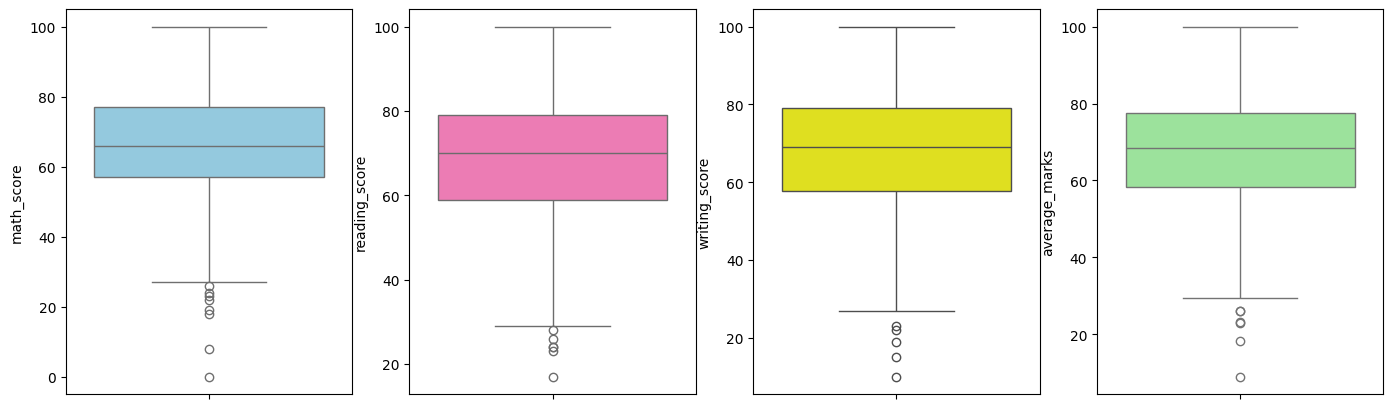

In [103]:
plt.subplots(1,4,figsize=(17,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_marks'],color='lightgreen')
plt.show()